# Trabalho 2 - Aprendizado Não Supervisionado

## Professor: Paulo Cotta

### Ideia do trabalho


Aprendizado não supervisionado para detecção de anomalias no preço das ações.
Temos um .csv que é o nosso dataset (conjunto de dados).

License of dataset: Anomaly detection in stock options pricing - MIT

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import scale
seaborn.set()
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
dados = pd.read_csv("/content/drive/My Drive/Colab Notebooks/aprendizado-nao-supervisionado/trabalho2/data.csv")
dados.head(10)

,Unnamed: 0,UnderlyingPrice,OptionSymbol,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest,IVMean,IVBid,IVAsk,Delta,Gamma,Theta,Vega,AKA
0,0,174.09,GS160108C00125000,call,01/08/2016,01/05/2016,125.0,0.0,46.95,50.80,0,0,0,0.0874,0.0,3.1911,1.0000,0.0000,0.0000,0.0000,GS160108C00125000
1,1,174.09,GS160108P00125000,put,01/08/2016,01/05/2016,125.0,0.0,0.00,0.31,0,0,0,1.9822,0.0,2.2141,-0.0150,0.0014,-0.2242,0.0053,GS160108P00125000
2,2,174.09,GS160108C00130000,call,01/08/2016,01/05/2016,130.0,0.0,41.80,45.80,0,0,0,0.0874,0.0,2.8946,1.0000,0.0000,0.0000,0.0000,GS160108C00130000
3,3,174.09,GS160108P00130000,put,01/08/2016,01/05/2016,130.0,0.0,0.00,0.31,0,0,0,1.7931,0.0,1.9882,-0.0175,0.0017,-0.2310,0.0060,GS160108P00130000
4,4,174.09,GS160108C00135000,call,01/08/2016,01/05/2016,135.0,0.0,36.95,40.90,0,0,0,0.0874,0.0,2.6480,1.0000,0.0000,0.0000,0.0000,GS160108C00135000
5,5,174.09,GS160108P00135000,put,01/08/2016,01/05/2016,135.0,0.0,0.00,0.33,0,0,0,1.5624,0.0,1.7887,-0.0179,0.0020,-0.2058,0.0061,GS160108P00135000
6,6,174.09,GS160108C00140000,call,01/08/2016,01/05/2016,140.0,0.0,31.75,35.80,0,0,0,0.0874,0.0,2.3219,1.0000,0.0000,0.0000,0.0000,GS160108C00140000
7,7,174.09,GS160108P00140000,put,01/08/2016,01/05/2016,140.0,0.0,0.00,0.22,0,0,0,1.3428,0.0,1.4610,-0.0186,0.0024,-0.1823,0.0063,GS160108P00140000
8,8,174.09,GS160108C00145000,call,01/08/2016,01/05/2016,145.0,0.0,26.75,30.95,0,0,0,0.0874,0.0,2.0976,1.0000,0.0000,0.0000,0.0000,GS160108C00145000
9,9,174.09,GS160108P00145000,put,01/08/2016,01/05/2016,145.0,0.0,0.00,0.23,0,0,0,1.1126,0.0,1.2704,-0.0179,0.0028,-0.1460,0.0061,GS160108P00145000


In [3]:
dados.describe()

,Unnamed: 0,UnderlyingPrice,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest,IVMean,IVBid,IVAsk,Delta,Gamma,Theta,Vega
count,858.000000,8.580000e+02,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,428.500000,1.740900e+02,186.463869,9.109988,20.894744,22.509755,20.349650,376.848485,384.405594,0.630892,0.159149,0.590690,-0.078274,0.008780,-0.077531,0.150592
std,247.827561,2.673199e-12,47.751953,19.266645,27.679726,29.122069,86.925383,1512.931102,1513.398965,2.198250,0.153752,0.517986,0.635420,0.010845,0.251748,0.214616
min,0.000000,1.740900e+02,80.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.054600,0.000000,0.216900,-0.997000,0.000000,-3.366600,0.000000
25%,214.250000,1.740900e+02,152.500000,0.000000,0.360000,0.472500,0.000000,0.000000,0.000000,0.264750,0.000000,0.291025,-0.710300,0.001900,-0.069675,0.018050
50%,428.500000,1.740900e+02,185.000000,0.350000,7.925000,8.700000,0.000000,7.000000,9.000000,0.320950,0.214300,0.383200,0.001100,0.004700,-0.028850,0.062200
75%,642.750000,1.740900e+02,217.500000,7.662500,32.337500,35.800000,2.000000,136.500000,141.750000,0.451050,0.271050,0.634250,0.289025,0.011175,-0.012800,0.175275
max,857.000000,1.740900e+02,310.000000,113.000000,134.000000,138.800000,933.000000,21595.000000,21567.000000,37.111400,0.721600,3.242900,1.000000,0.079600,0.001000,0.991800


In [4]:
dados.shape

(858, 21)

##### *Questão 1*

Quais são os dados de preços das ações no conjunto de dados? Explique e apresente abaixo apenas as colunas que contém tais dados.

As colunas que representam os valores de preço são: **UnderlyingPrice, Strike, Last, Bid** e **Ask**.

In [5]:
dados_preco = dados.iloc[:,[1,6,7,8,9]]
dados_preco.head()

,UnderlyingPrice,Strike,Last,Bid,Ask
0,174.09,125.0,0.0,46.95,50.80
1,174.09,125.0,0.0,0.00,0.31
2,174.09,130.0,0.0,41.80,45.80
3,174.09,130.0,0.0,0.00,0.31
4,174.09,135.0,0.0,36.95,40.90


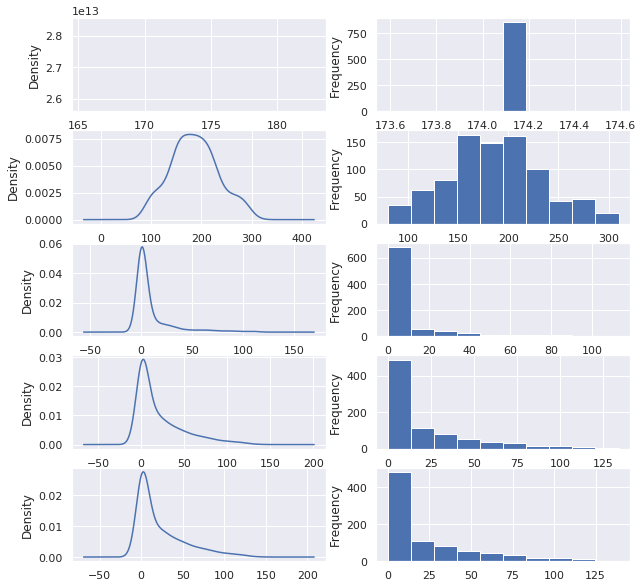

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))

dados["UnderlyingPrice"].plot(kind='kde', grid=True, label=True, ax=axes[0, 0])
dados["UnderlyingPrice"].plot(kind='hist',  grid=True, label=True, ax=axes[0, 1])

dados["Strike"].plot(kind='kde', grid=True, label=True, ax=axes[1, 0])
dados["Strike"].plot(kind='hist',  grid=True, label=True, ax=axes[1, 1])

dados["Last"].plot(kind='kde', grid=True, label=True, ax=axes[2, 0])
dados["Last"].plot(kind='hist',  grid=True, label=True, ax=axes[2, 1])

dados["Bid"].plot(kind='kde', grid=True, label=True, ax=axes[3, 0])
dados["Bid"].plot(kind='hist',  grid=True, label=True, ax=axes[3, 1])

dados["Ask"].plot(kind='kde', grid=True, label=True, ax=axes[4, 0])
dados["Ask"].plot(kind='hist',  grid=True, label=True, ax=axes[4, 1])

#### *Questão 2*

*Aprendizado não supervisionado para encontrar discrepâncias (anomalias)*

**Respostas em negrito abaixo**

Explique:

O que seria uma anomalia no dataset? **Resposta: uma anomalia no contexto dos preços das ações é qualquer incompatibilidade lógica estabelecida pelas relações dos preços. Podem ser feitas várias medidas, como por exemplo a razão entre os preços de compra e venda de uma ação em relação aos dias de negociação entre os contratos de compra e venda.**

Para fins de detecção de anomalias, utilize algum algoritmo de aprendizado não supervisionado para identificar os cluster dos dados.

Exemplos de algoritmos não supervisionados:
- Isolation Forest
- K-Means
- KNN
- Randon Forest
- entre outros.

Apresente o código e detalhe, explicando a arquitetura criada/selecionada, além de apresentar dados de visualização (Data visualization [Utilizando Numpy, Pandas e Matplotlib]).

Neste caso, vamos criar três novas colunas:

1.   A média entre o preço de compra (*bid*) e venda (*ask*);
2.   A diferença dos dias entre a data da compra (*Expiration*) a data da venda (*DataDate*);
3.   A razão entre o preço de compra (*bid*) e venda (*ask*);

Esses serão nossos principais parâmetros para detectar as anomalias usando **IsolationForest**.

In [0]:
dados_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aprendizado-nao-supervisionado/trabalho2/data.csv', parse_dates=["Expiration", ' DataDate'])
dados_df['diferencadias'] = (dados_df['Expiration'] - dados_df[' DataDate']).dt.days
dados_df['diferencapreco'] = dados_df['Ask'] - dados_df['Bid']
dados_df['mediapreco'] = (dados_df['Ask'] + dados_df['Bid']) / 2

In [8]:
dados_interesse_df = dados_df.iloc[:,[1,6,7,8,9,21,22,23]]
dados_interesse_df.head()

,UnderlyingPrice,Strike,Last,Bid,Ask,diferencadias,diferencapreco,mediapreco
0,174.09,125.0,0.0,46.95,50.80,3,3.85,48.875
1,174.09,125.0,0.0,0.00,0.31,3,0.31,0.155
2,174.09,130.0,0.0,41.80,45.80,3,4.00,43.800
3,174.09,130.0,0.0,0.00,0.31,3,0.31,0.155
4,174.09,135.0,0.0,36.95,40.90,3,3.95,38.925


In [0]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples='auto',contamination=.025,n_estimators=10,random_state=19117,max_features=dados_interesse_df.shape[1],behaviour='new')
clf.fit(dados_interesse_df)

predicao = clf.predict(dados_interesse_df)

In [10]:
dados_interesse_df['predicao'] = predicao
dados_interesse_df['tipo_operacao'] = dados_df.iloc[:,[3]]
dados_interesse_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,UnderlyingPrice,Strike,Last,Bid,Ask,diferencadias,diferencapreco,mediapreco,predicao,tipo_operacao
0,174.09,125.0,0.0,46.95,50.80,3,3.85,48.875,1,call
1,174.09,125.0,0.0,0.00,0.31,3,0.31,0.155,1,put
2,174.09,130.0,0.0,41.80,45.80,3,4.00,43.800,1,call
3,174.09,130.0,0.0,0.00,0.31,3,0.31,0.155,1,put
4,174.09,135.0,0.0,36.95,40.90,3,3.95,38.925,1,call


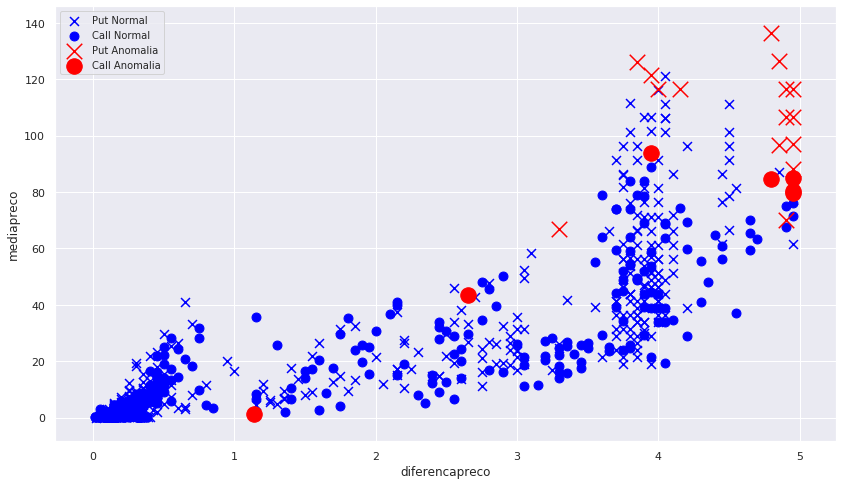

In [16]:
plt.figure(figsize=(14, 8))

plt.scatter(dados_interesse_df[(dados_interesse_df['predicao']==1) & (dados_interesse_df['tipo_operacao']=='put')]['diferencapreco'], \
            dados_interesse_df[(dados_interesse_df['predicao']==1) & (dados_interesse_df['tipo_operacao']=='put')]['mediapreco'], \
            label='Put Normal', c='blue', s=20*4, marker='x')

plt.scatter(dados_interesse_df[(dados_interesse_df['predicao']==1) & (dados_interesse_df['tipo_operacao']=='call')]['diferencapreco'], \
            dados_interesse_df[(dados_interesse_df['predicao']==1) & (dados_interesse_df['tipo_operacao']=='call')]['mediapreco'], \
            label='Call Normal', c='blue', s=20*4, marker='o')

plt.scatter(dados_interesse_df[(dados_interesse_df['predicao']==-1) & (dados_interesse_df['tipo_operacao']=='put')]['diferencapreco'], \
            dados_interesse_df[(dados_interesse_df['predicao']==-1) & (dados_interesse_df['tipo_operacao']=='put')]['mediapreco'], \
            label='Put Anomalia', c='red', s=60*4, marker='x')

plt.scatter(dados_interesse_df[(dados_interesse_df['predicao']==-1) & (dados_interesse_df['tipo_operacao']=='call')]['diferencapreco'], \
            dados_interesse_df[(dados_interesse_df['predicao']==-1) & (dados_interesse_df['tipo_operacao']=='call')]['mediapreco'], \
            label='Call Anomalia', c='red', s=60*4, marker='o')

plt.legend(fontsize='medium')
plt.xlabel('diferencapreco')
plt.ylabel('mediapreco')
plt.show()